Enter the dimension of the system: 3
Enter coefficient for row 1, column 1: 4
Enter coefficient for row 1, column 2: -1
Enter coefficient for row 1, column 3: -1
Enter coefficient for row 2, column 1: -2
Enter coefficient for row 2, column 2: 6
Enter coefficient for row 2, column 3: 1
Enter coefficient for row 3, column 1: -1
Enter coefficient for row 3, column 2: 1
Enter coefficient for row 3, column 3: 7
Enter constant for equation 1: 3
Enter constant for equation 2: 9
Enter constant for equation 3: -6
Values of x
|       x1 |      x2 |        x3 |
|----------+---------+-----------|
| 0.75     | 1.5     | -0.857143 |
| 0.910714 | 1.89286 | -0.964286 |
| 0.982143 | 1.96429 | -0.997449 |
| 0.991709 | 1.99362 | -0.997449 |
| 0.999043 | 1.99681 | -1.00027  |
| 0.999134 | 1.99973 | -0.999681 |
| 1.00001  | 1.99966 | -1.00008  |
| 0.999893 | 2.00002 | -0.99995  |
| 1.00002  | 1.99996 | -1.00002  |
| 0.999985 | 2.00001 | -0.999991 |
| 1        | 1.99999 | -1        |
| 0.999997 | 2       | 

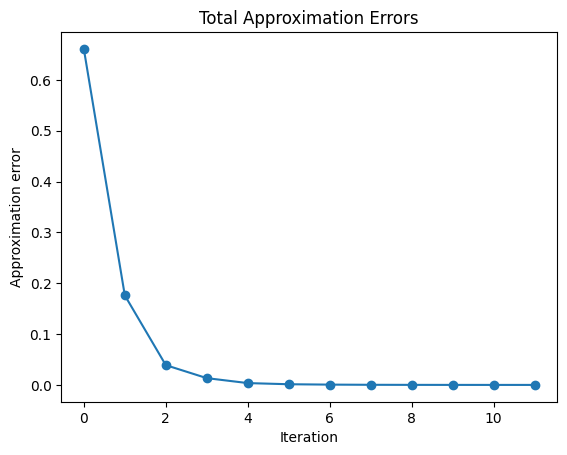

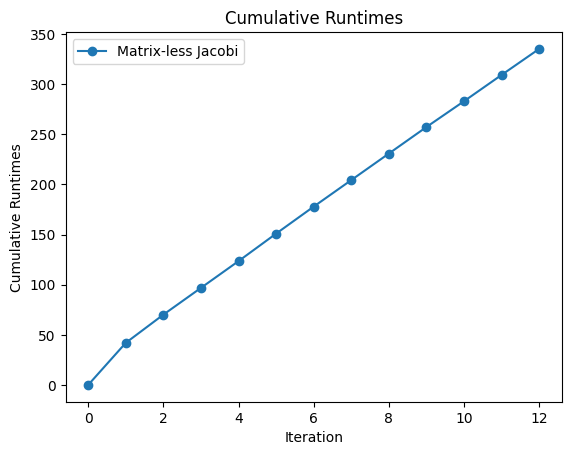

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time as tm
import tabulate

def input_matrix(prompt, dimension):
    matrix = np.zeros((dimension, dimension))
    for i in range(dimension):
        for j in range(dimension):
            matrix[i][j] = float(input(prompt.format(i+1, j+1)))
    return matrix

def input_vector(prompt, dimension):
    vector = np.zeros(dimension)
    for i in range(dimension):
        vector[i] = float(input(prompt.format(i+1)))
    return vector

dimension = int(input("Enter the dimension of the system: "))
coeff_matrix = input_matrix("Enter coefficient for row {}, column {}: ", dimension)
const_vector = input_vector("Enter constant for equation {}: ", dimension)

x0 = np.zeros(dimension)

D = np.diag(np.diag(coeff_matrix))
L_plus_U = coeff_matrix - D
C = np.matmul(np.linalg.inv(D), const_vector)
T = -np.matmul(np.linalg.inv(D), L_plus_U)

jacobi_iteration_array = []
time_iter = []
time_matr = []

def check_solution(x):
    ans = np.matmul(coeff_matrix, x) - const_vector
    return all(abs(i) <= 1e-5 for i in ans)

def jacobi_iteration(x):
    return np.matmul(T, x) + C

def jacobi_matrixless_iteration(x):
    x_k = []
    for i in range(dimension):
        x_k_i = (const_vector[i] - np.dot(coeff_matrix[i], x) + coeff_matrix[i, i] * x[i]) / coeff_matrix[i, i]
        x_k.append(x_k_i)
    return x_k

while not check_solution(x0):
    x0 = jacobi_matrixless_iteration(x0)
    jacobi_iteration_array.append(x0)
    time_iter.append(tm.time())

x0 = np.zeros(dimension)
while not check_solution(x0):
    x0 = jacobi_iteration(x0)
    time_matr.append(tm.time())

approx_error = [np.abs(np.array(jacobi_iteration_array[i]) - np.array(jacobi_iteration_array[i-1])) for i in range(1, len(jacobi_iteration_array))]
time_iter = [(t - time_iter[0]) * 1e6 for t in time_iter]
time_matr = [(t - time_matr[0]) * 1e6 for t in time_matr]

print("Values of x")
headers = [f'x{i+1}' for i in range(dimension)]
print(tabulate.tabulate(jacobi_iteration_array, headers=headers, tablefmt='orgtbl'))

print("Approximation errors")
print(tabulate.tabulate(approx_error, headers=headers, tablefmt='orgtbl'))

plt.plot(range(len(approx_error)), [sum(err) for err in approx_error], marker='o')
plt.title('Total Approximation Errors')
plt.xlabel('Iteration')
plt.ylabel('Approximation error')
plt.show()

plt.plot(range(len(time_iter)), time_iter, marker='o', label='Matrix-less Jacobi')
plt.legend()
plt.title('Cumulative Runtimes')
plt.xlabel('Iteration')
plt.ylabel('Cumulative Runtimes')
plt.show()


Enter the dimension of the system: 3
Enter coefficient for row 1, column 1: 4
Enter coefficient for row 1, column 2: -1
Enter coefficient for row 1, column 3: -1
Enter coefficient for row 2, column 1: -2
Enter coefficient for row 2, column 2: 6
Enter coefficient for row 2, column 3: 1
Enter coefficient for row 3, column 1: -1
Enter coefficient for row 3, column 2: 1
Enter coefficient for row 3, column 3: 7
Enter constant for equation 1: 3
Enter constant for equation 2: 9
Enter constant for equation 3: -6
Approximation errors
         x1           x2           x3
-----------  -----------  -----------
0.160714     0.392857     0.107143
0.0714286    0.0714286    0.0331633
0.00956633   0.0293367    1.11022e-16
0.00733418   0.00318878   0.00282434
9.11079e-05  0.00291545   0.000592201
0.000876913  6.83309e-05  0.000403478
0.000117952  0.000359551  0.000135035
0.000123646  6.18232e-05  6.82147e-05
3.25095e-05  5.25846e-05  2.64957e-05
1.97701e-05  1.52524e-05  1.21563e-05
6.85218e-06  8.6160

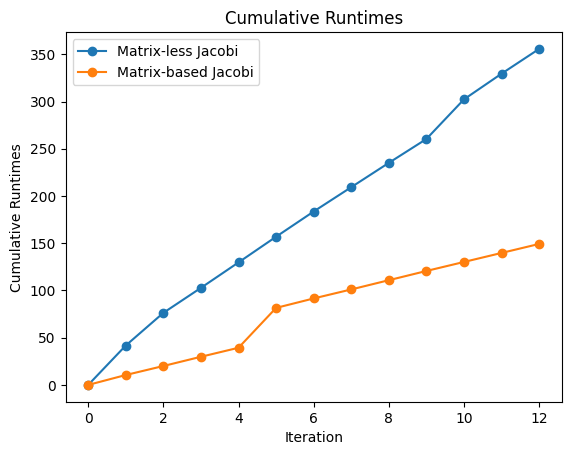

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import time as tm
import tabulate

def input_matrix(prompt, dimension):
    matrix = np.zeros((dimension, dimension))
    for i in range(dimension):
        for j in range(dimension):
            matrix[i][j] = float(input(prompt.format(i+1, j+1)))
    return matrix

def input_vector(prompt, dimension):
    vector = np.zeros(dimension)
    for i in range(dimension):
        vector[i] = float(input(prompt.format(i+1)))
    return vector

dimension = int(input("Enter the dimension of the system: "))
coeff_matrix = input_matrix("Enter coefficient for row {}, column {}: ", dimension)
const_vector = input_vector("Enter constant for equation {}: ", dimension)

x0 = np.zeros(dimension)

D = np.diag(np.diag(coeff_matrix))
L_plus_U = coeff_matrix - D
C = np.matmul(np.linalg.inv(D), const_vector)
T = -np.matmul(np.linalg.inv(D), L_plus_U)

jacobi_iteration_array = []
time_iter = []
time_matr = []

def check_solution(x):
    ans = np.matmul(coeff_matrix, x) - const_vector
    return all(abs(i) <= 1e-5 for i in ans)

def jacobi_iteration(x):
    return np.matmul(T, x) + C

def jacobi_matrixless_iteration(x):
    x_k = []
    for i in range(dimension):
        x_k_i = (const_vector[i] - np.dot(coeff_matrix[i], x) + coeff_matrix[i, i] * x[i]) / coeff_matrix[i, i]
        x_k.append(x_k_i)
    return x_k

while not check_solution(x0):
    x0 = jacobi_matrixless_iteration(x0)
    jacobi_iteration_array.append(x0)
    time_iter.append(tm.time())

x0 = np.zeros(dimension)
while not check_solution(x0):
    x0 = jacobi_iteration(x0)
    time_matr.append(tm.time())

approx_error = [np.abs(np.array(jacobi_iteration_array[i]) - np.array(jacobi_iteration_array[i-1])) for i in range(1, len(jacobi_iteration_array))]
time_iter = [(t - time_iter[0]) * 1e6 for t in time_iter]
time_matr = [(t - time_matr[0]) * 1e6 for t in time_matr]

print("Approximation errors")
print(tabulate.tabulate(approx_error, headers=headers))

plt.plot(range(len(time_iter)), time_iter, marker='o', label='Matrix-less Jacobi')
plt.plot(range(len(time_matr)), time_matr, marker='o', label='Matrix-based Jacobi')
plt.legend()
plt.title('Cumulative Runtimes')
plt.xlabel('Iteration')
plt.ylabel('Cumulative Runtimes')
plt.show()
